In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('heart_disease_uci.csv')

In [4]:
print(df.sample(5))

      id  age     sex        dataset               cp  trestbps   chol    fbs  \
144  145   58    Male      Cleveland      non-anginal     105.0  240.0  False   
387  388   46    Male        Hungary     asymptomatic     180.0  280.0  False   
126  127   56  Female      Cleveland     asymptomatic     200.0  288.0   True   
831  832   61    Male  VA Long Beach  atypical angina       NaN  283.0  False   
804  805   65    Male  VA Long Beach     asymptomatic     136.0  248.0  False   

              restecg  thalch  exang  oldpeak        slope   ca  \
144    lv hypertrophy   154.0   True      0.6         flat  0.0   
387  st-t abnormality   120.0  False      0.0          NaN  NaN   
126    lv hypertrophy   133.0   True      4.0  downsloping  2.0   
831            normal     NaN    NaN      NaN          NaN  NaN   
804            normal   140.0   True      4.0  downsloping  NaN   

                  thal  num  
144  reversable defect    0  
387                NaN    0  
126  reversable defe

Heart Disease Analysis: Understanding Key Risk Indicators

Problem Statement¶
Heart disease is one of the leading causes of death worldwide. Identifying risk factors and understanding their impact can help develop strategies for early detection and prevention. This project aims to analyze a dataset of heart disease patients to explore patterns and correlations among key health indicators, such as cholesterol levels, blood pressure, and age, to determine their relationship with heart disease.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [6]:
print('number rows',df.shape[0])
print('number columns',df.shape[1])

number rows 920
number columns 16


In [7]:
missing_value = df.isnull().sum().sort_values(ascending=False)
print(missing_value)

ca          611
thal        486
slope       309
fbs          90
oldpeak      62
trestbps     59
thalch       55
exang        55
chol         30
restecg       2
id            0
age           0
sex           0
dataset       0
cp            0
num           0
dtype: int64


Target Variable Analysis

0: No heart disease
1: Mild heart disease
2: Moderate heart disease
3: Severe heart disease
4: Very severe heart disease


num
0    411
1    265
2    109
3    107
4     28
Name: count, dtype: int64


C:\Users\ASUS\AppData\Local\Temp\ipykernel_23192\2851464335.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df , x= 'num' , palette='viridis')


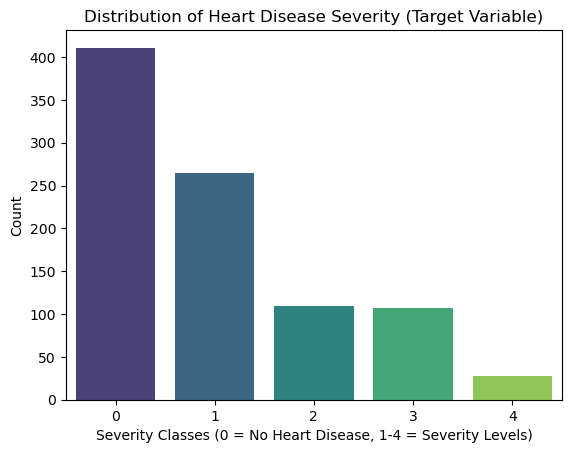

In [8]:
target_counts = df['num'].value_counts()
print(target_counts)
sns.countplot(data=df , x= 'num' , palette='viridis')
plt.title("Distribution of Heart Disease Severity (Target Variable)")
plt.xlabel("Severity Classes (0 = No Heart Disease, 1-4 = Severity Levels)")
plt.ylabel("Count")
plt.show()

Text(0.5, 1.0, 'Distribution of Age')

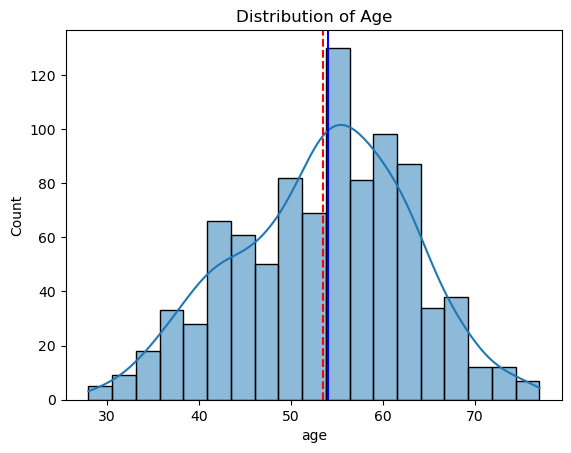

In [9]:
sns.histplot(df['age'],kde=True)
plt.axvline(df['age'].mean(), color='r', linestyle='--', label='Mean Age')
plt.axvline(df['age'].median(), color='b', linestyle='-', label='Median Age')
plt.title("Distribution of Age")

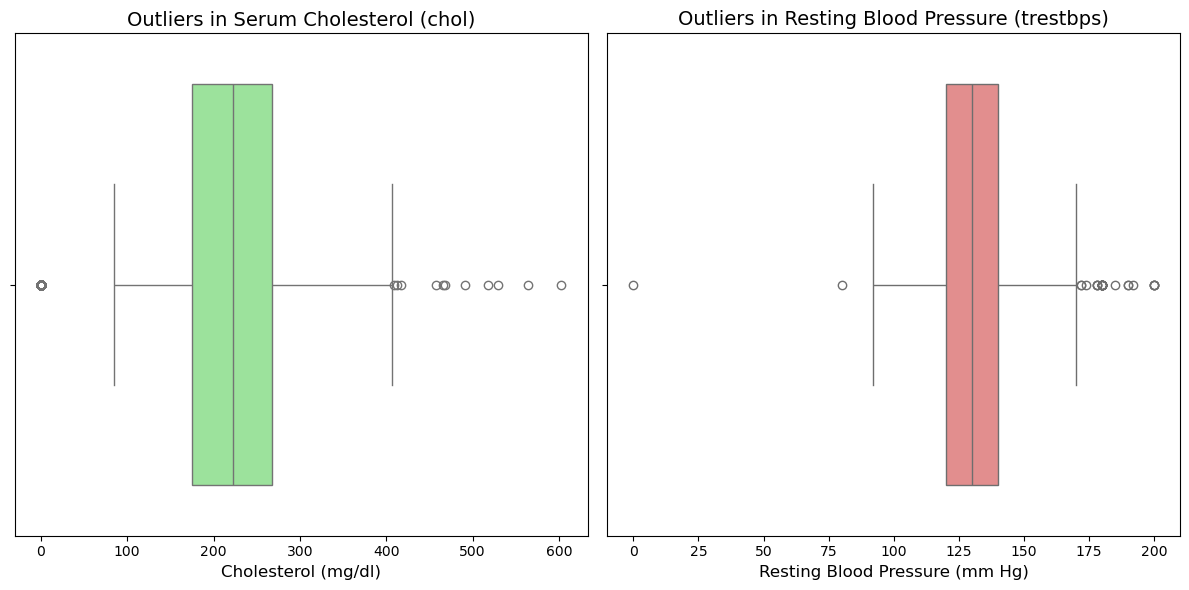

In [10]:
plt.figure(figsize=(12, 6))

# Plotting Cholesterol boxplot
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
sns.boxplot(x=df['chol'], color='lightgreen')
plt.title('Outliers in Serum Cholesterol (chol)', fontsize=14)
plt.xlabel('Cholesterol (mg/dl)', fontsize=12)

# Plotting Resting Blood Pressure boxplot
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
sns.boxplot(x=df['trestbps'], color='lightcoral')
plt.title('Outliers in Resting Blood Pressure (trestbps)', fontsize=14)
plt.xlabel('Resting Blood Pressure (mm Hg)', fontsize=12)

# Adjust layout and show plot
plt.tight_layout()
plt.show()

In [11]:
import plotly.express as px
# Create a bar chart with counts
fig = px.bar(df, x='dataset', color='sex', barmode='group')

# Add counts as text labels
df_counts = df.groupby(['dataset', 'sex']).size().reset_index(name='count')
fig = px.bar(df_counts, x='dataset', y='count', color='sex', barmode='group', text='count')


fig.show()

In [12]:
#histogram to see the distribution of gender on age using plotly
fig = px.histogram(df, x='age', color='sex')
fig.show()

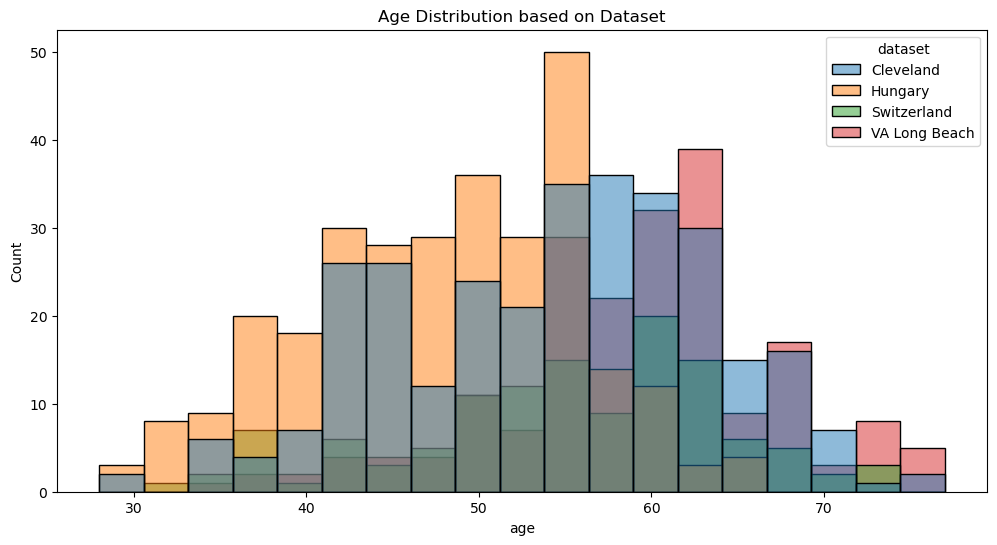

In [50]:
fig = plt.figure(figsize=(12,6))
sns.histplot(df,x='age',hue='dataset')
plt.title('Age Distribution based on Dataset')
plt.show()

In [13]:
# Calculate average and median values for resting blood pressure (trestbps)
avg_trestbps = df['trestbps'].mean()
median_trestbps = df['trestbps'].median()

# Calculate average and median values for serum cholesterol (chol)
avg_chol = df['chol'].mean()
median_chol = df['chol'].median()

# Calculate average and median values for maximum heart rate achieved (thalach)
avg_thalach = df['thalch'].mean()
median_thalach = df['thalch'].median()

# Display the results
print("### Health Metrics ###")
print(f"Average Resting Blood Pressure (trestbps): {avg_trestbps:.2f}")
print(f"Median Resting Blood Pressure (trestbps): {median_trestbps}")
print(f"Average Serum Cholesterol (chol): {avg_chol:.2f}")
print(f"Median Serum Cholesterol (chol): {median_chol}")
print(f"Average Maximum Heart Rate Achieved (thalach): {avg_thalach:.2f}")
print(f"Median Maximum Heart Rate Achieved (thalach): {median_thalach}")

### Health Metrics ###
Average Resting Blood Pressure (trestbps): 132.13
Median Resting Blood Pressure (trestbps): 130.0
Average Serum Cholesterol (chol): 199.13
Median Serum Cholesterol (chol): 223.0
Average Maximum Heart Rate Achieved (thalach): 137.55
Median Maximum Heart Rate Achieved (thalach): 140.0


In [14]:
# unique values in columns

df.nunique()

id          920
age          50
sex           2
dataset       4
cp            4
trestbps     61
chol        217
fbs           2
restecg       3
thalch      119
exang         2
oldpeak      53
slope         3
ca            4
thal          3
num           5
dtype: int64

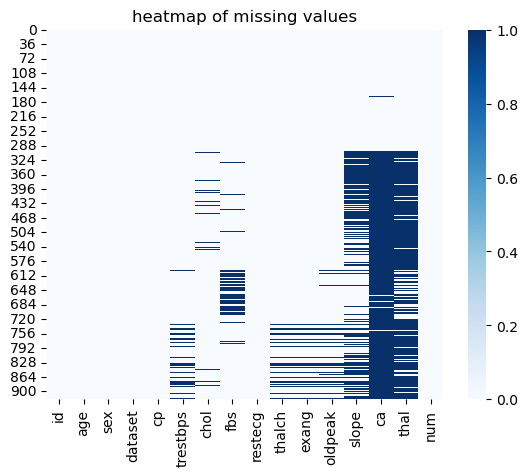

In [15]:
fig = plt.Figure(figsize=(30,30))
sns.heatmap(df.isnull(),cbar=True,cmap='Blues')
plt.title('heatmap of missing values')
plt.show()

In [16]:
num_cols = [col for col in df.columns if  df[col].dtype != 'object']
cat_cols = [col for col in df.columns if  df[col].dtype == 'object']

In [17]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder
from sklearn.impute import SimpleImputer,KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [43]:
# impute missing values in numeric columns using iterative imputer

df[num_cols] = KNNImputer().fit_transform(df[num_cols])

# check null values

print(df.isnull().sum().sort_values(ascending=False)/len(df)*100)

id          0.0
age         0.0
sex         0.0
dataset     0.0
cp          0.0
trestbps    0.0
chol        0.0
fbs         0.0
restecg     0.0
thalch      0.0
exang       0.0
oldpeak     0.0
slope       0.0
ca          0.0
thal        0.0
num         0.0
dtype: float64


In [20]:
from sklearn.ensemble import RandomForestClassifier

In [44]:
# Impute categorical columns using Random Forest Classifier

for col in cat_cols:
    # Separate data into known and unknown values for the current column
    known_data = df[df[col].notna()]
    unknown_data = df[df[col].isna()]

    # Check if there are any unknown values to impute
    if unknown_data.shape[0] > 0:  # Proceed only if there are unknown values
        # Define features and target for the Random Forest model
        # Exclude categorical features from X_known
        X_known = known_data.drop(columns=[col] + cat_cols)  # Exclude all cat_cols
        y_known = known_data[col]
        X_unknown = unknown_data.drop(columns=[col] + cat_cols) # Exclude all cat_cols

        # Create and fit LabelEncoder for the target variable
        encoder = LabelEncoder()
        y_known_encoded = encoder.fit_transform(y_known)

        # Create and train a Random Forest classifier
        model = RandomForestClassifier()
        model.fit(X_known, y_known_encoded)

        # Predict missing values and impute them in the DataFrame
        imputed_values = model.predict(X_unknown)
        imputed_values = encoder.inverse_transform(imputed_values)  # Inverse transform to get original labels
        df.loc[df[col].isna(), col] = imputed_values

In [45]:
print(df.isnull().sum().sort_values(ascending=False))

id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64


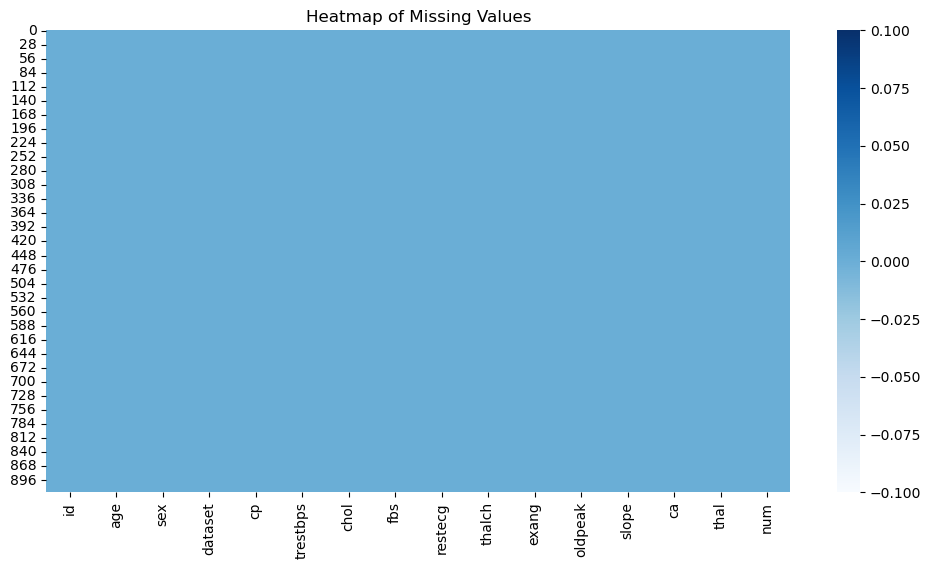

In [23]:
# Heatmap of missing values

fig = plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(),cbar=True,cmap='Blues')
plt.title('Heatmap of Missing Values')
plt.show()

Deal with Outliers

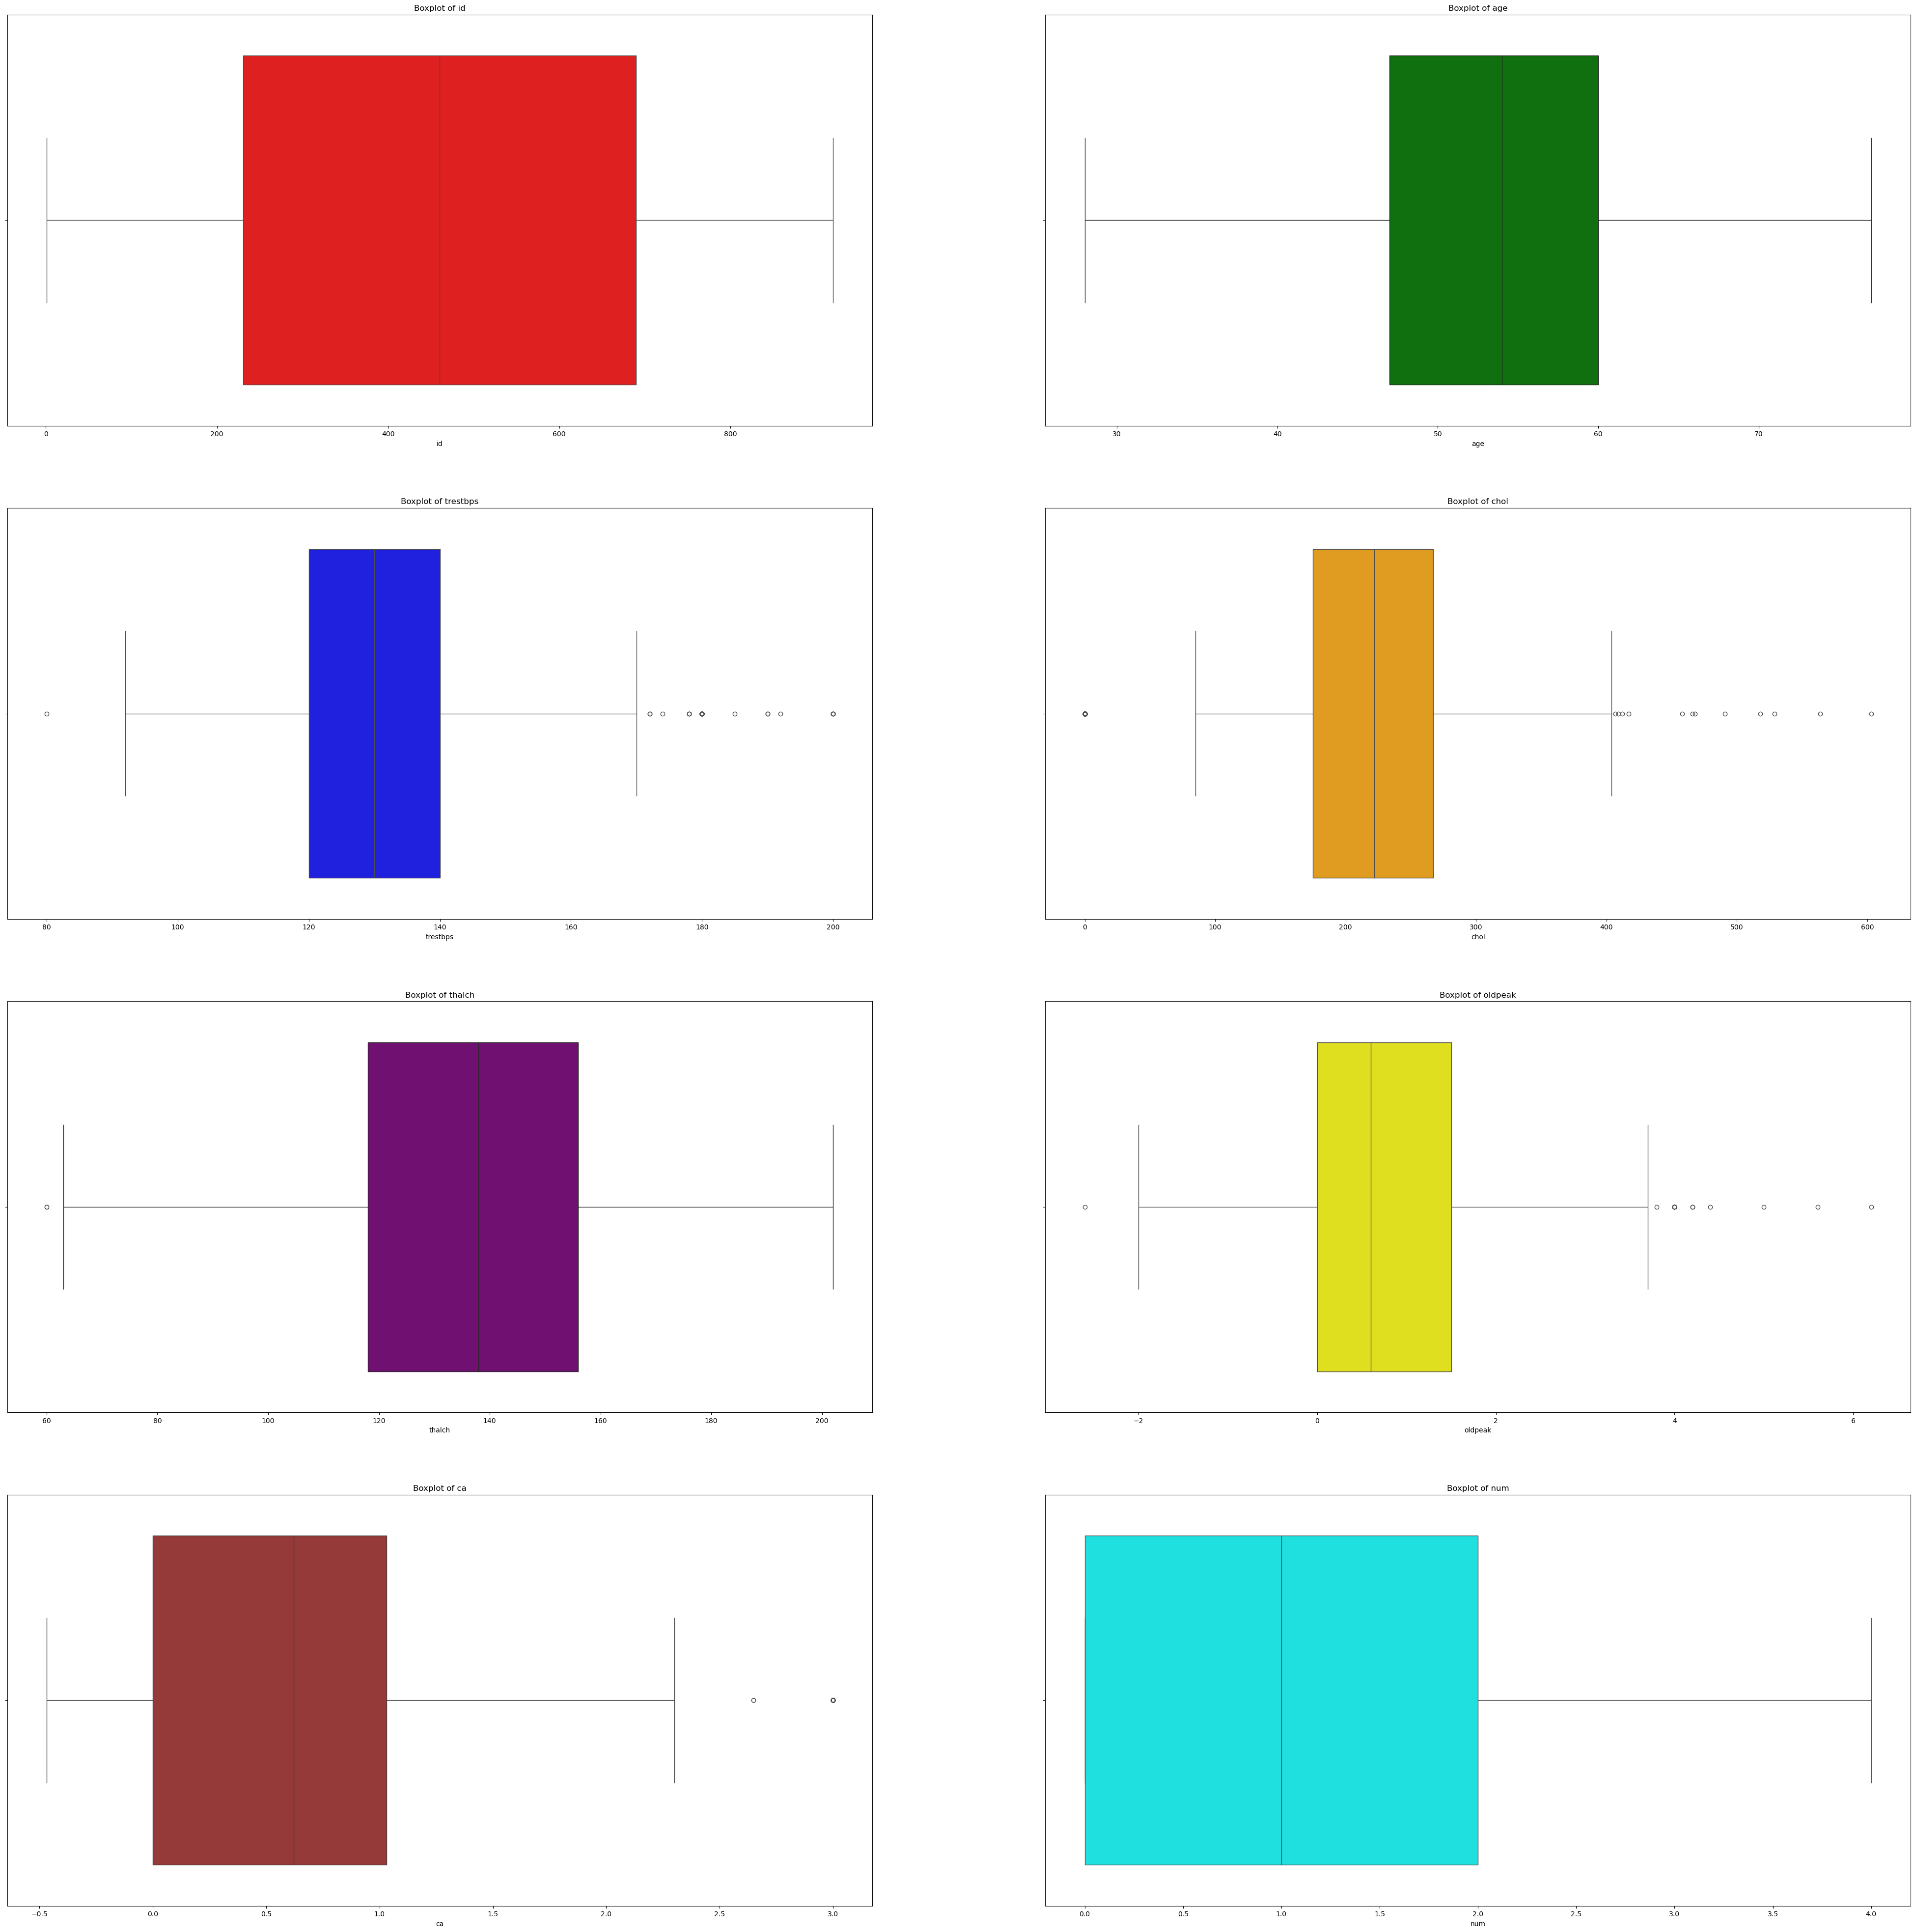

In [46]:
# Boxplot of numeric columns using for loop
plt.figure(figsize=(50, 50))

# Extend the colors list to have at least as many colors as num_cols
colors = ['red', 'green', 'blue', 'orange', 'purple', 'yellow', 'brown', 'cyan', 'magenta']
for i ,col in enumerate(num_cols):
    plt.subplot(4, 2, i+1)
    sns.boxplot(x=df[col], color=colors[i])
    plt.title(f'Boxplot of {col}')
plt.show()


In [47]:

df[df['trestbps']==0]
df.drop(df[df['trestbps']==0].index,inplace=True)

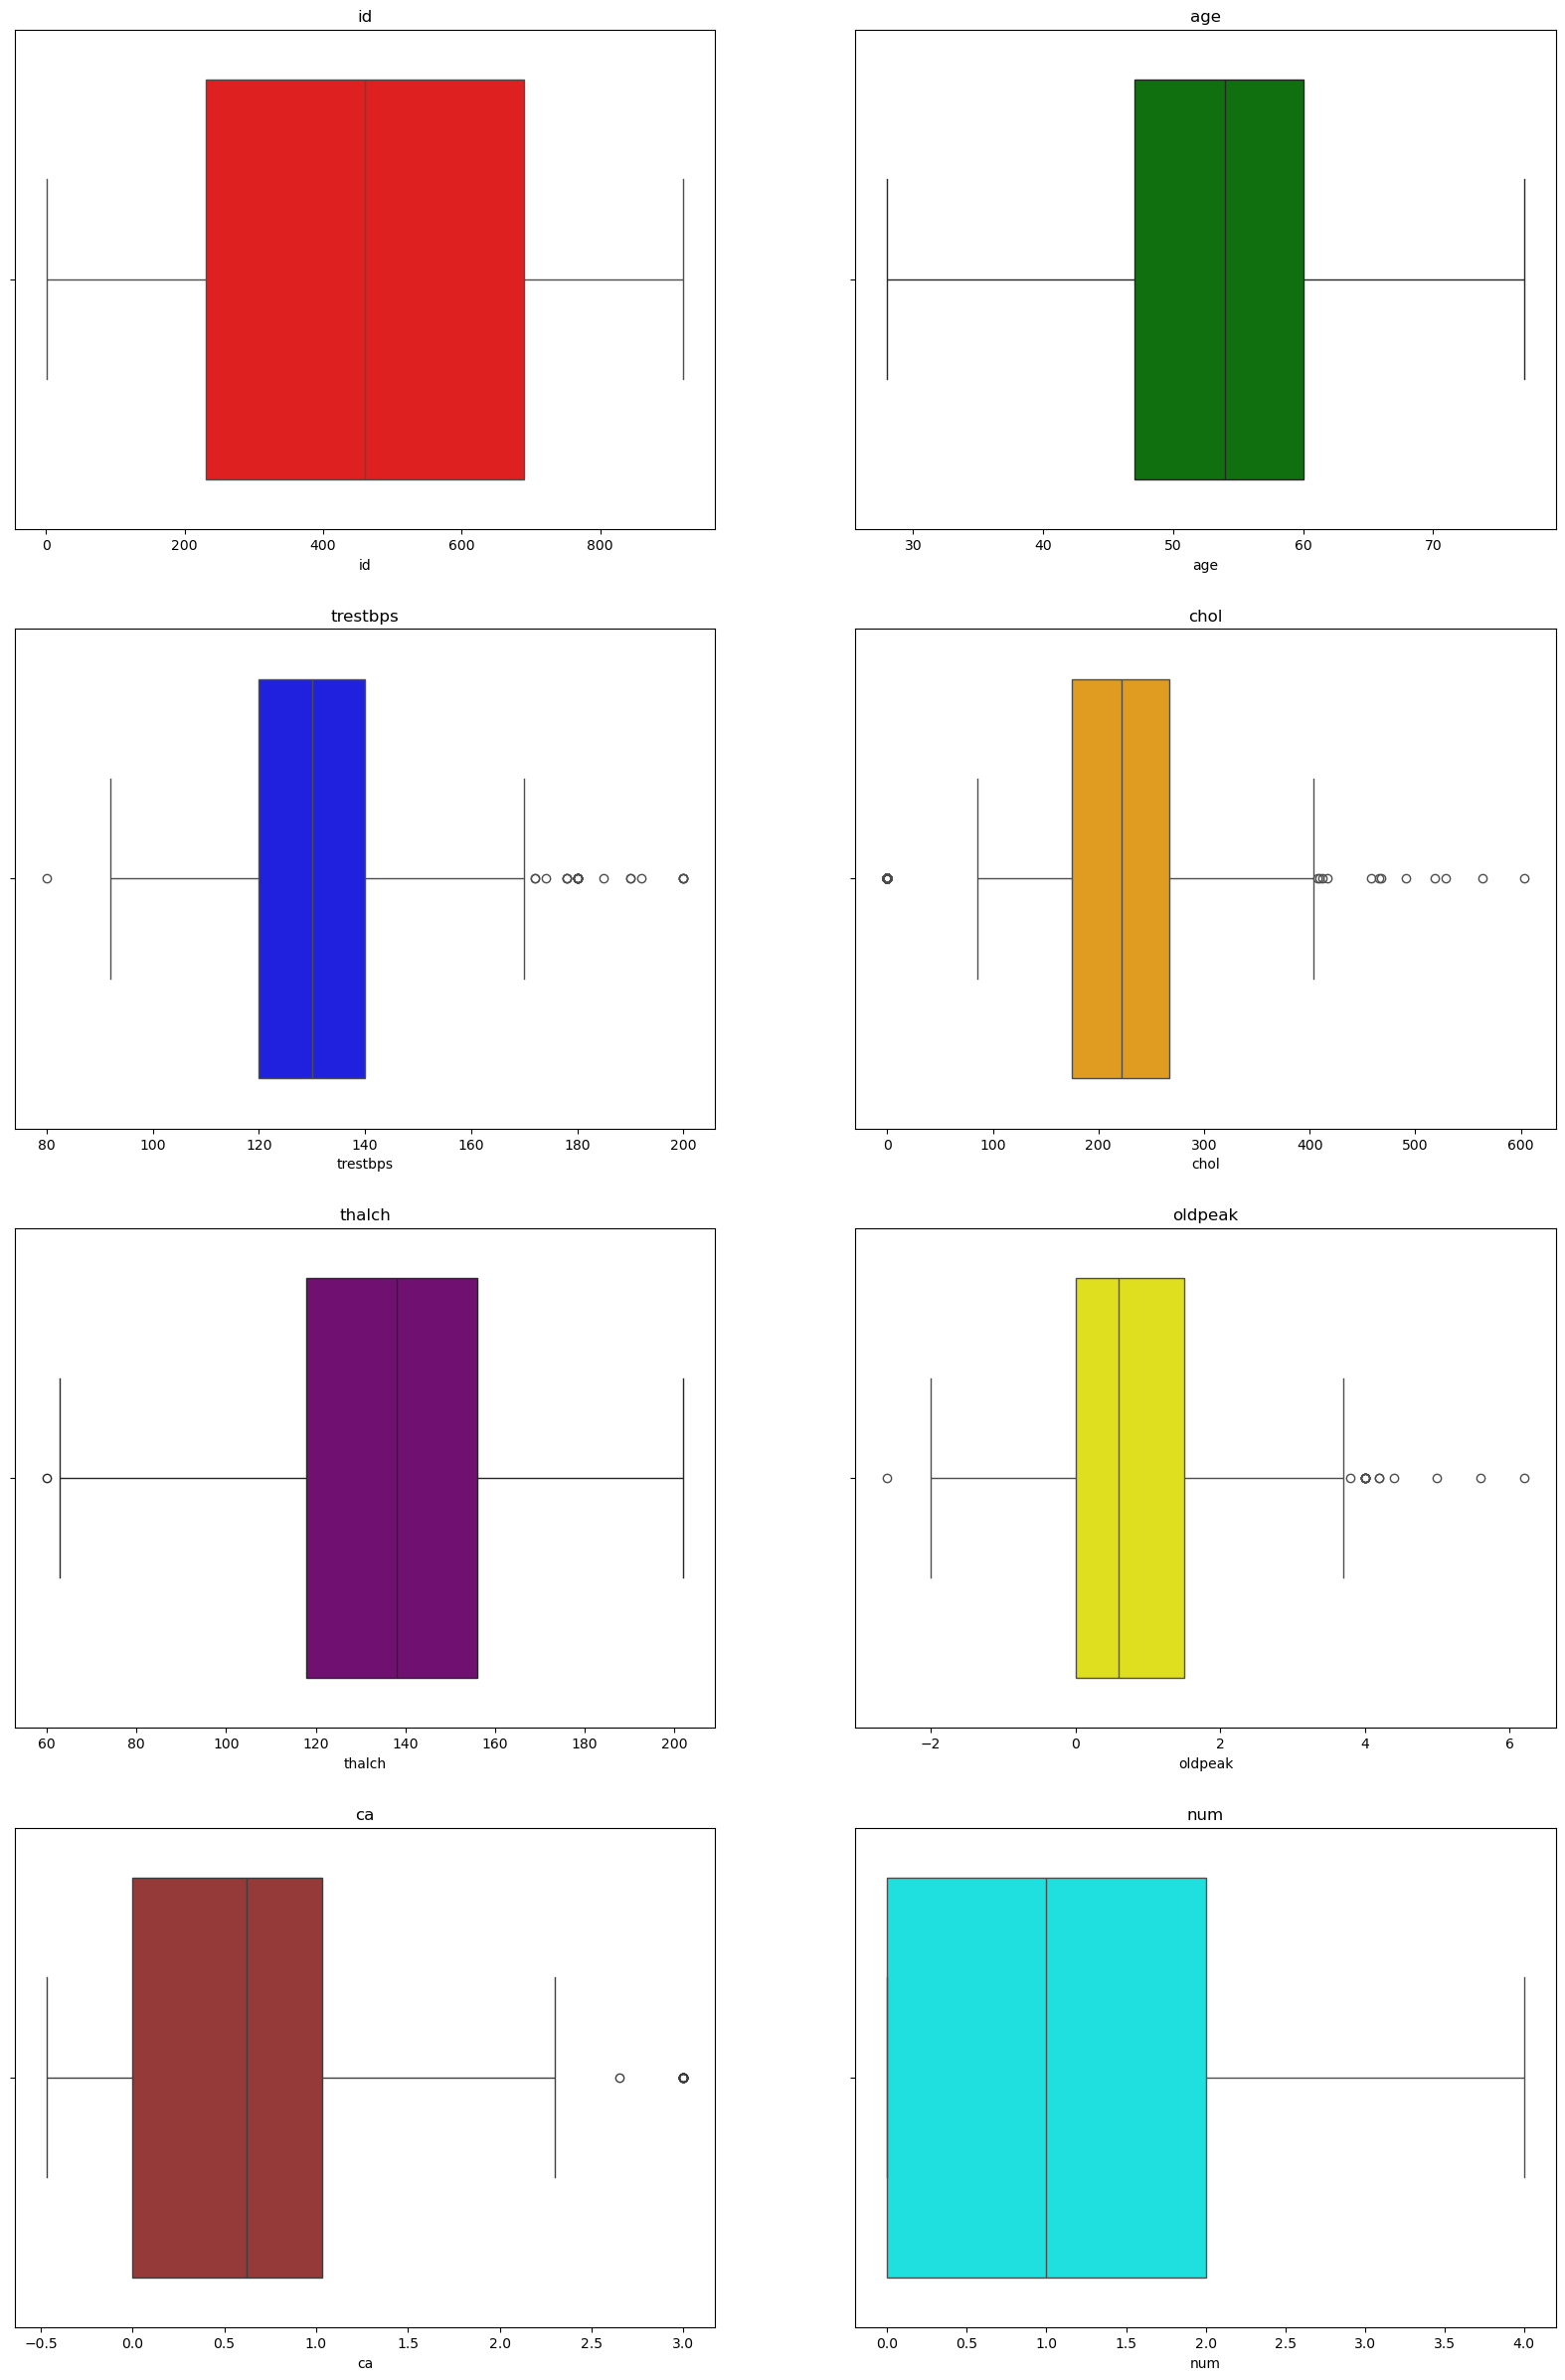

In [48]:
# make Boxplot of numeric columns using for loop
plt.figure(figsize=(20, 30))

# Extend the colors list to have at least as many colors as num_cols
colors = ['red', 'green', 'blue', 'orange', 'purple', 'yellow', 'brown', 'cyan', 'magenta']

# Adjusted subplot grid to 4 rows, 2 columns to accommodate 8 plots
for i, col in enumerate(num_cols):
    plt.subplot(4, 2, i+1)  # Changed to 4 rows, 2 columns
    sns.boxplot(x=df[col], color=colors[i % len(colors)]) # Use modulo operator to cycle through colors
    plt.title(col)
plt.show()

In [36]:
print('Mean',df.groupby('dataset')['age'].mean())
print('-------------------')
print('Median',df.groupby('dataset')['age'].median())
print('-------------------')
print('Mode',df.groupby('dataset')['age'].agg(pd.Series.mode))

Mean dataset
Cleveland        54.351974
Hungary          47.894198
Switzerland      55.317073
VA Long Beach    59.371859
Name: age, dtype: float64
-------------------
Median dataset
Cleveland        55.5
Hungary          49.0
Switzerland      56.0
VA Long Beach    60.0
Name: age, dtype: float64
-------------------
Mode dataset
Cleveland                58.0
Hungary                  54.0
Switzerland              61.0
VA Long Beach    [62.0, 63.0]
Name: age, dtype: object


In [38]:
X = df.drop('num',axis=1)
y = df['num']

In [77]:
df['num'].unique()

array([0., 2., 1., 3., 4.])

In [39]:
cat_cols

['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']

In [40]:
# label encode categorical variables

le = LabelEncoder()
X['sex'] = le.fit_transform(X['sex'])
X['dataset'] = le.fit_transform(X['dataset'])
X['cp'] = le.fit_transform(X['cp'])
X['fbs'] = le.fit_transform(X['fbs'])
X['restecg'] = le.fit_transform(X['restecg'])
X['exang'] = le.fit_transform(X['exang'])
X['slope'] = le.fit_transform(X['slope'])
X['thal'] = le.fit_transform(X['thal'])

In [51]:
X.shape

(919, 15)

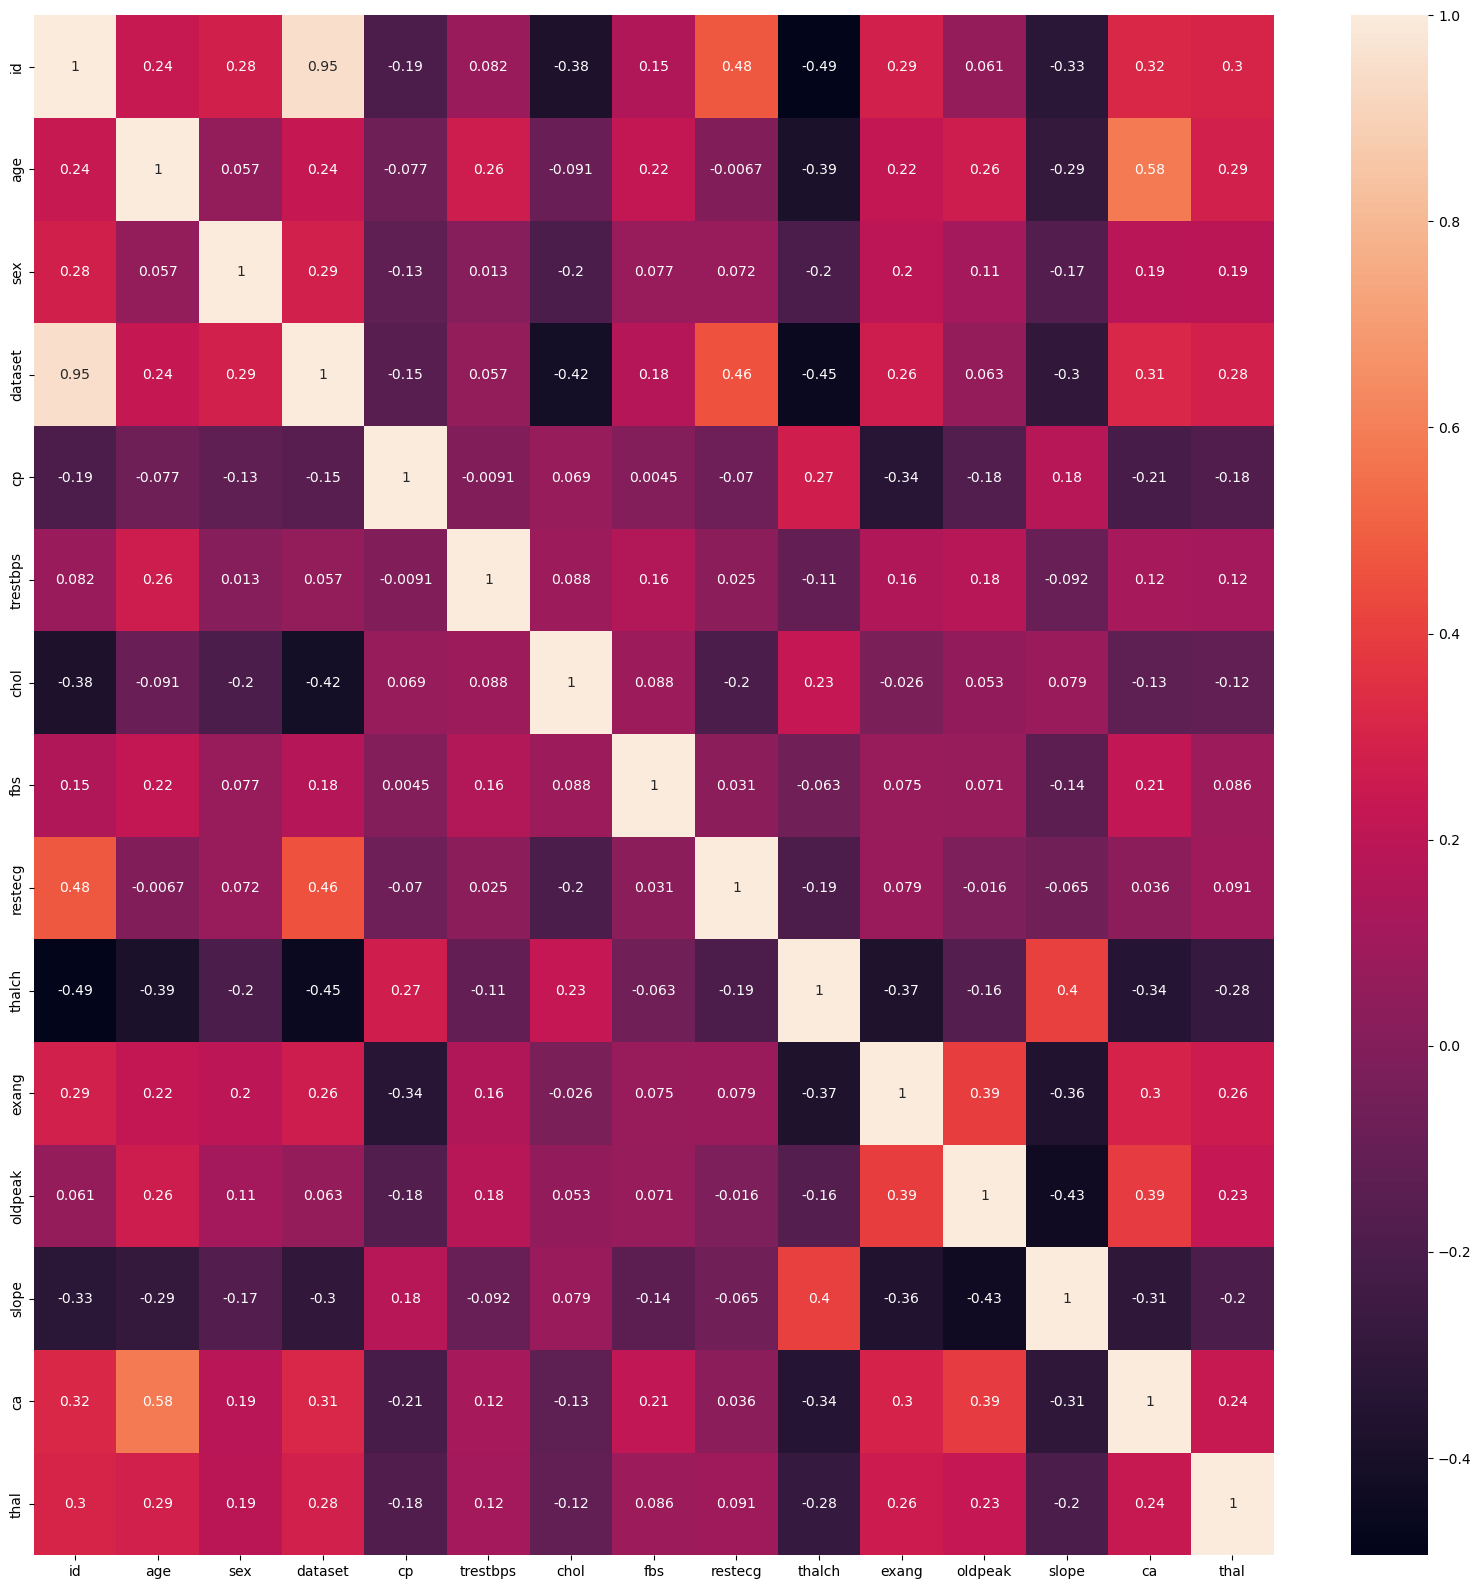

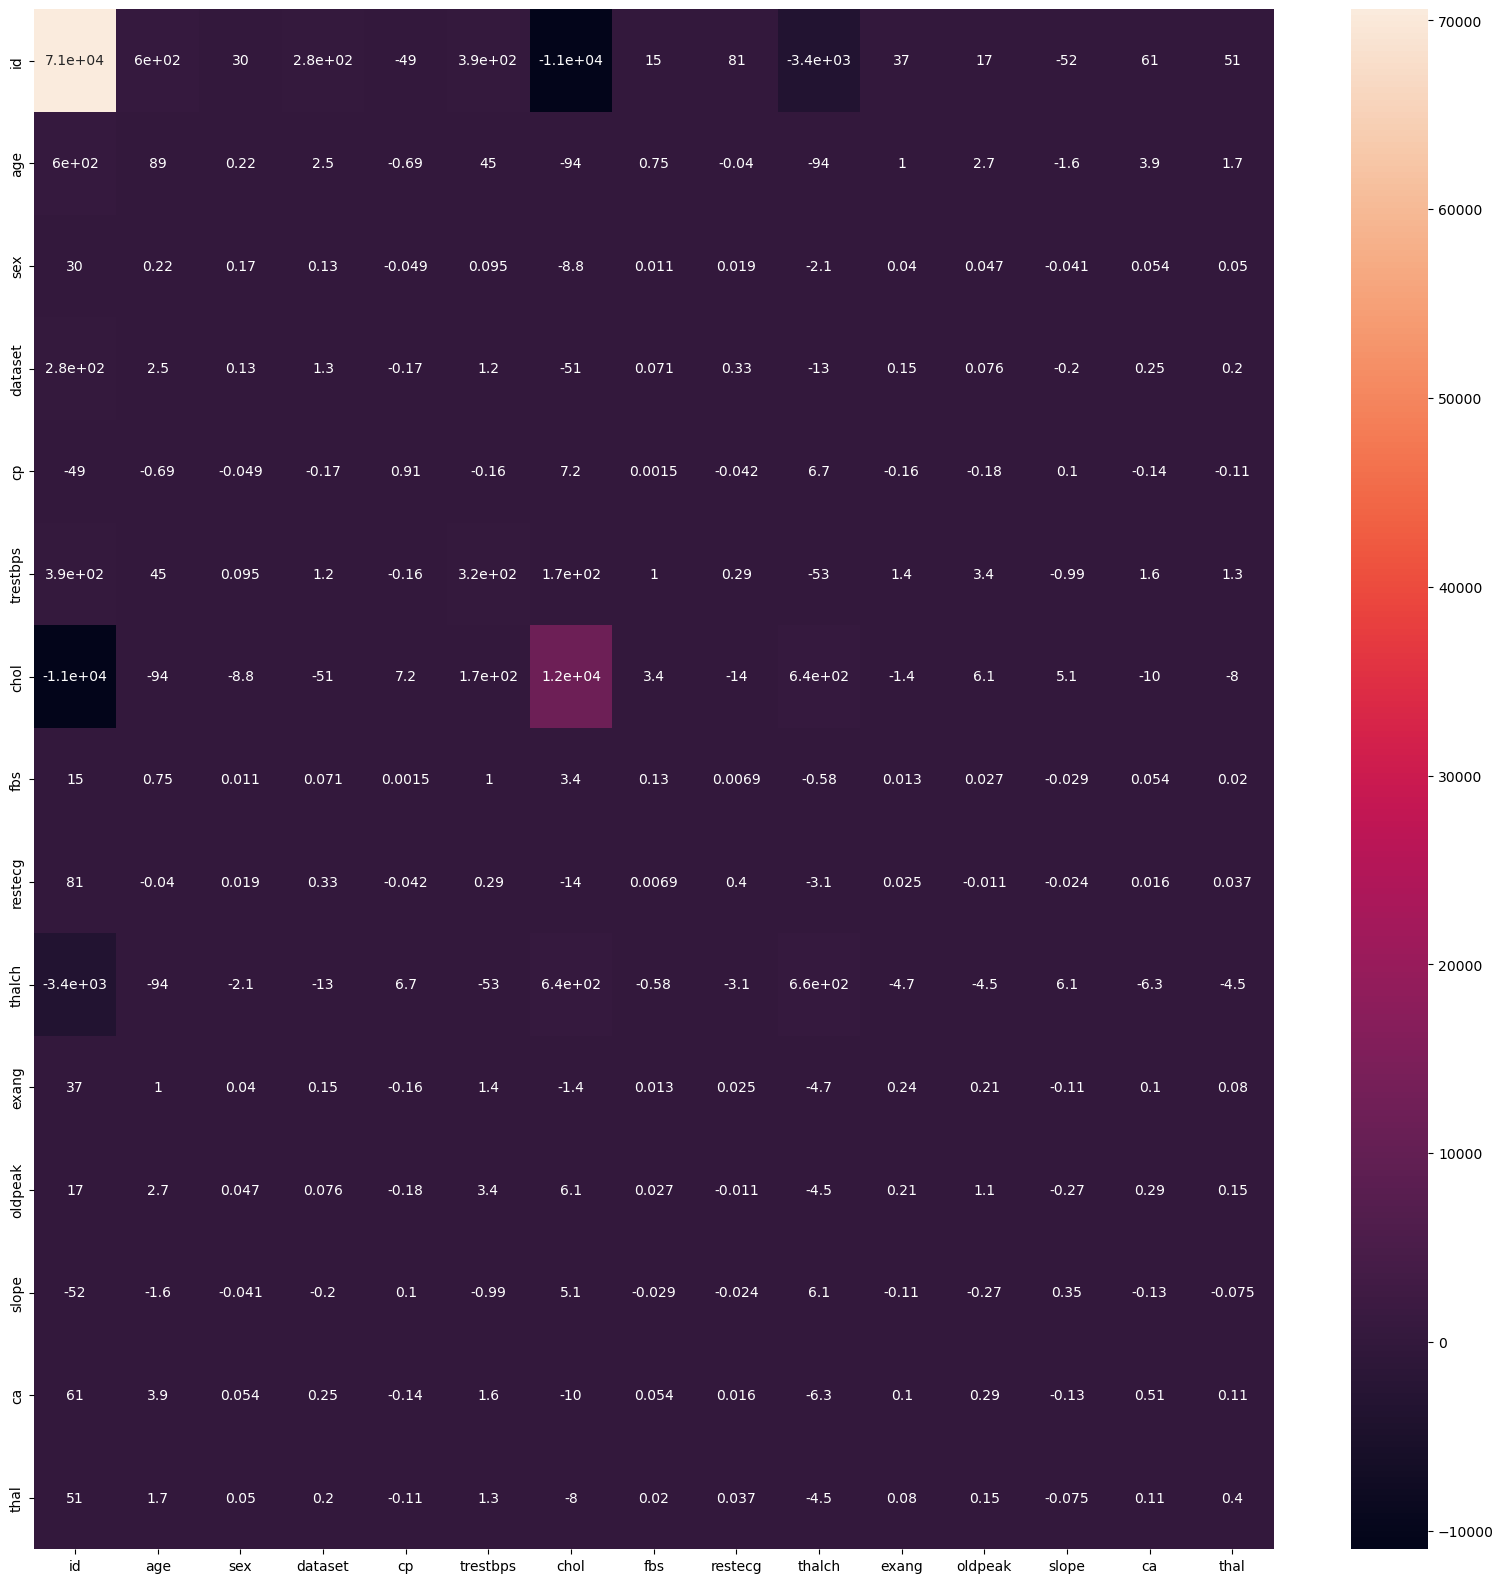

In [63]:
plt.figure(figsize=(20, 20))
sns.heatmap(X.corr(), annot=True)
plt.show()
plt.figure(figsize=(20, 20))
sns.heatmap(X.cov(), annot=True)
plt.show()

In [64]:
X.drop('id',axis=1,inplace=True)

In [65]:
from sklearn.decomposition import PCA
PCA = PCA(n_components=3)
X_pca = PCA.fit_transform(X)
X_pca = pd.DataFrame(X_pca,columns=['PC1','PC2','PC3'])


In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_pca,y , test_size=0.2, random_state=42)

In [69]:
from sklearn.neural_network import MLPClassifier
models = {
    'FeedforwardNetwork_identity' : MLPClassifier(hidden_layer_sizes=[10, 10],max_iter=100,activation='identity',alpha= 0.01,early_stopping=True,),
    'FeedforwardNetwork_logistic' : MLPClassifier(hidden_layer_sizes=[10, 10],max_iter=100,activation='logistic',alpha= 0.01,early_stopping=True,),
    'FeedforwardNetwork_tanh' : MLPClassifier(hidden_layer_sizes=[10, 10],max_iter=100,activation='tanh',alpha= 0.01,early_stopping=True,),
    'FeedforwardNetwork_relu' : MLPClassifier(hidden_layer_sizes=[10, 10],max_iter=100,activation='relu',alpha= 0.01,early_stopping=True,)
}


In [71]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

model_scores = []
for name, model in models.items():
    # fit each model from models on training data
    model.fit(X_train, y_train)

    # make prediction from each model
    y_pred = model.predict(X_test)
    metric = mean_absolute_error(y_test, y_pred)
    model_scores.append((name, metric))

    # print the performing metric
    print(name, 'MSE: ', mean_squared_error(y_test, y_pred))
    print(name, 'R2: ', r2_score(y_test, y_pred))
    print(name, 'MAE: ', mean_absolute_error(y_test, y_pred))
    print('\n')

# selecting the best model from all above models with evaluation metrics sorting method
refine_models = sorted(model_scores, key=lambda x: x[1], reverse=False)
for model in refine_models:
    print('Mean absolute error for', f"{model[0]} is {model[1]: .2f}")

FeedforwardNetwork_identity MSE:  1.5380434782608696
FeedforwardNetwork_identity R2:  -0.2532973909694809
FeedforwardNetwork_identity MAE:  0.8206521739130435


FeedforwardNetwork_logistic MSE:  2.2934782608695654
FeedforwardNetwork_logistic R2:  -0.8688745547318761
FeedforwardNetwork_logistic MAE:  1.0326086956521738


FeedforwardNetwork_tanh MSE:  1.826086956521739
FeedforwardNetwork_tanh R2:  -0.48801386348319986
FeedforwardNetwork_tanh MAE:  0.9021739130434783


FeedforwardNetwork_relu MSE:  2.282608695652174
FeedforwardNetwork_relu R2:  -0.8600173293539999
FeedforwardNetwork_relu MAE:  1.108695652173913


Mean absolute error for FeedforwardNetwork_identity is  0.82
Mean absolute error for FeedforwardNetwork_tanh is  0.90
Mean absolute error for FeedforwardNetwork_logistic is  1.03
Mean absolute error for FeedforwardNetwork_relu is  1.11


In [80]:
from sklearn.model_selection import GridSearchCV

results = []

# Define hyperparameters for each model
model_params = {
    'FeedforwardNetwork_identity': (MLPClassifier(hidden_layer_sizes=[ 6, 4, 5], max_iter=100, activation='identity', alpha=0.01, early_stopping=True), 
                                    {'model__hidden_layer_sizes': [( 6, 4, 5), (20, 20)], 'model__alpha': [0.01, 0.001]}),
    'FeedforwardNetwork_logistic': (MLPClassifier(hidden_layer_sizes=[ 6, 4, 5], max_iter=100, activation='logistic', alpha=0.01, early_stopping=True), 
                                    {'model__hidden_layer_sizes': [( 6, 4, 5), (20, 20)], 'model__alpha': [0.01, 0.001]}),
    'FeedforwardNetwork_tanh': (MLPClassifier(hidden_layer_sizes=[ 6, 4, 5], max_iter=100, activation='tanh', alpha=0.01, early_stopping=True), 
                                {'model__hidden_layer_sizes': [( 6, 4, 5), (20, 20)], 'model__alpha': [0.01, 0.001]}),
    'FeedforwardNetwork_relu': (MLPClassifier(hidden_layer_sizes=[ 6, 4, 5], max_iter=100, activation='relu', alpha=0.01, early_stopping=True), 
                                {'model__hidden_layer_sizes': [(7, 6, 4, 5), (20, 20)], 'model__alpha': [0.01, 0.001]})
}


# Train and predict each model with evaluation metrics
for name, (model, params) in model_params.items():
    # Create a pipeline with the model
    pipeline = Pipeline(steps=[('model', model)])

    # Create a grid search CV to tune the hyperparameters
    grid_search = GridSearchCV(pipeline, params, cv=5)

    # Fit the pipeline
    grid_search.fit(X_train, y_train)

    # Make predictions
    y_pred = grid_search.predict(X_test)

    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    # print the performing metric
    print(name, 'MSE: ', mean_squared_error(y_test, y_pred))
    print(name, 'R2: ', r2_score(y_test, y_pred))
    print(name, 'MAE: ', mean_absolute_error(y_test, y_pred))
    print('\n')

    # Store results
    results.append({"Model": name, "MSE": mse, "R2": r2, "MAE": mae})

# Convert results to a DataFrame for better visualization
results_df = pd.DataFrame(results)

# Select the best model based on the lowest MAE
best_model = results_df.loc[results_df['MAE'].idxmin()]

print("\nBest Model:")
print(best_model)

FeedforwardNetwork_identity MSE:  1.5380434782608696
FeedforwardNetwork_identity R2:  -0.2532973909694809
FeedforwardNetwork_identity MAE:  0.8206521739130435


FeedforwardNetwork_logistic MSE:  2.2934782608695654
FeedforwardNetwork_logistic R2:  -0.8688745547318761
FeedforwardNetwork_logistic MAE:  1.0326086956521738


FeedforwardNetwork_tanh MSE:  1.983695652173913
FeedforwardNetwork_tanh R2:  -0.6164436314624047
FeedforwardNetwork_tanh MAE:  0.9619565217391305


FeedforwardNetwork_relu MSE:  1.9673913043478262
FeedforwardNetwork_relu R2:  -0.6031577933955903
FeedforwardNetwork_relu MAE:  1.0217391304347827



Best Model:
Model    FeedforwardNetwork_identity
MSE                         1.538043
R2                         -0.253297
MAE                         0.820652
Name: 0, dtype: object


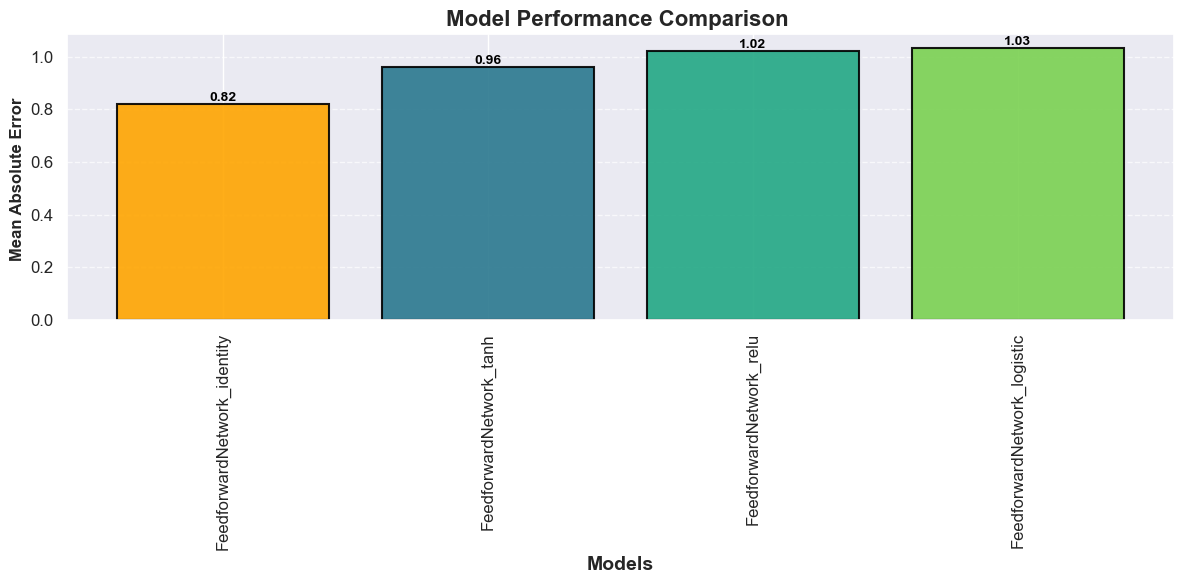

In [81]:
# Sort the results DataFrame by MSE in ascending order
sorted_results_df = results_df.sort_values(by='MAE')

# Set the aesthetics of the plot
sns.set(style="darkgrid", palette="pastel")

# Create a bar plot
plt.figure(figsize=(12, 6))
bars = plt.bar(sorted_results_df['Model'], sorted_results_df['MAE'], color=sns.color_palette("viridis", len(sorted_results_df)))

# Highlight the best model
best_model_index = sorted_results_df['MAE'].idxmin()
bars[best_model_index].set_color('orange')

# Adding labels and title with enhanced font styling
plt.xlabel('Models', fontsize=14, fontweight='bold')
plt.ylabel('Mean Absolute Error ', fontsize=12, fontweight='bold')
plt.title('Model Performance Comparison ', fontsize=16, fontweight='bold')
plt.xticks(rotation=90, fontsize=12, fontweight='medium')
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding a shadow effect to the bars
for bar in bars:
    bar.set_edgecolor('black')
    bar.set_linewidth(1.5)
    bar.set_alpha(0.9)  # Slight transparency for better visibility

# Add data labels on top of the bars with more styling
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2),
             ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')

# Show the plot with a tight layout
plt.tight_layout()
plt.show()